# Data Mining Project - Group XX 2025/2026

# Import Libraries

In [ ]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

from itertools import product
from ydata_profiling import ProfileReport

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

#o svg consegue ampliar infinitamente os gráficos sem perder qualidade mas às vezes é mais lento 
#por isso agora usamos retina


sns.set()

# Data Exploration and Initial Analysis

## Loading the data

Import the datasets from csv files using commas as separators of the columns and setting the unique customer identifier as the index of both columns.

In [ ]:
flightsDB = pd.read_csv('DM_AIAI_FlightsDB.csv', sep = ",", index_col= "Loyalty#")
customerDB = pd.read_csv('DM_AIAI_CustomerDB.csv', sep = ",", index_col= "Loyalty#")
metaData = pd.read_csv('DM_AIAI_Metadata.csv', sep = ";", header= None)

## Metadata

In [ ]:
#display(metaData)

**CustomerDB Database Variable Description**
- **Loyalty#:**  Unique customer identifier for loyalty program members
- **First Name:**   Customer's first name
- **Last Name:**   Customer's last name 
- **Customer Name:** Customer's full name (concatenated)
- **Country:**	Customer's country of residence
- **Province or State:**	Customer's province or state
- **City:**	Customer's city of residence
- **Latitude:**	Geographic latitude coordinate of customer location
- **Longitude:**	Geographic longitude coordinate of customer locatio
- **Postal code:**	Customer's postal/ZIP code
- **Gender:**	Customer's gender
- **Education:**	Customer's highest education level (Bachelor, College, etc.)
- **Location:** Code	Urban/Suburban/Rural classification of customer residence
- **Income:**	Customer's annual income
- **Marital Status:**	Customer's marital status (Married, Single, Divorced)
- **LoyaltyStatus:**	Current tier status in loyalty program (Star > Nova > Aurora)
- **EnrollmentDateOpening:**	Date when customer joined the loyalty program
- **CancellationDate:**	Date when customer left the program
- **Customer Lifetime:** Value	Total calculated monetary value of customer relationship
- **EnrollmentType:**	Method of joining loyalty program


**FlightsDB Database Variable Description**
- **Loyalty#:**	Unique customer identifier linking to CustomerDB
- **Year:**	Year of flight activity record
- **Month:**	Month of flight activity record (1-12)
- **YearMonthDate:**	First day of the month for the activity period
- **NumFlights:**	Total number of flights taken by customer in the month
- **NumFlightsWithCompanions:**	Number of flights where customer traveled with companions
- **DistanceKM:**	Total distance traveled in kilometers for the month
- **PointsAccumulated:**	Loyalty points earned by customer during the month
- **PointsRedeemed:**	Loyalty points spent/redeemed by customer during the month
- **DollarCostPointsRedeemed:**	Dollar value of points redeemed during the month

# Data Understanding

## Descriptive Statistics and Visualisations (CustomerDB)

Create 2 lists to differentiate from metric and non-metric features.

In [16]:
metric_features_CDB = customerDB.select_dtypes(include=['number']).columns.tolist()
non_metric_features_CDB = customerDB.columns.drop(metric_features_CDB).to_list()

# Create for loops to iterate over each feature of each type and list them one in each line.
print("Metric Features:")
for i, feature in enumerate(metric_features_CDB, 1):
    print(f" {i}. {feature}")

print("\nNon-Metric Features:")
for i, feature in enumerate(non_metric_features_CDB, 1):
    print(f" {i}. {feature}")

Metric Features:
 1. Unnamed: 0
 2. Latitude
 3. Longitude
 4. Income
 5. Customer Lifetime Value

Non-Metric Features:
 1. First Name
 2. Last Name
 3. Customer Name
 4. Country
 5. Province or State
 6. City
 7. Postal code
 8. Gender
 9. Education
 10. Location Code
 11. Marital Status
 12. LoyaltyStatus
 13. EnrollmentDateOpening
 14. CancellationDate
 15. EnrollmentType


Create histograms for a general analysis of the features

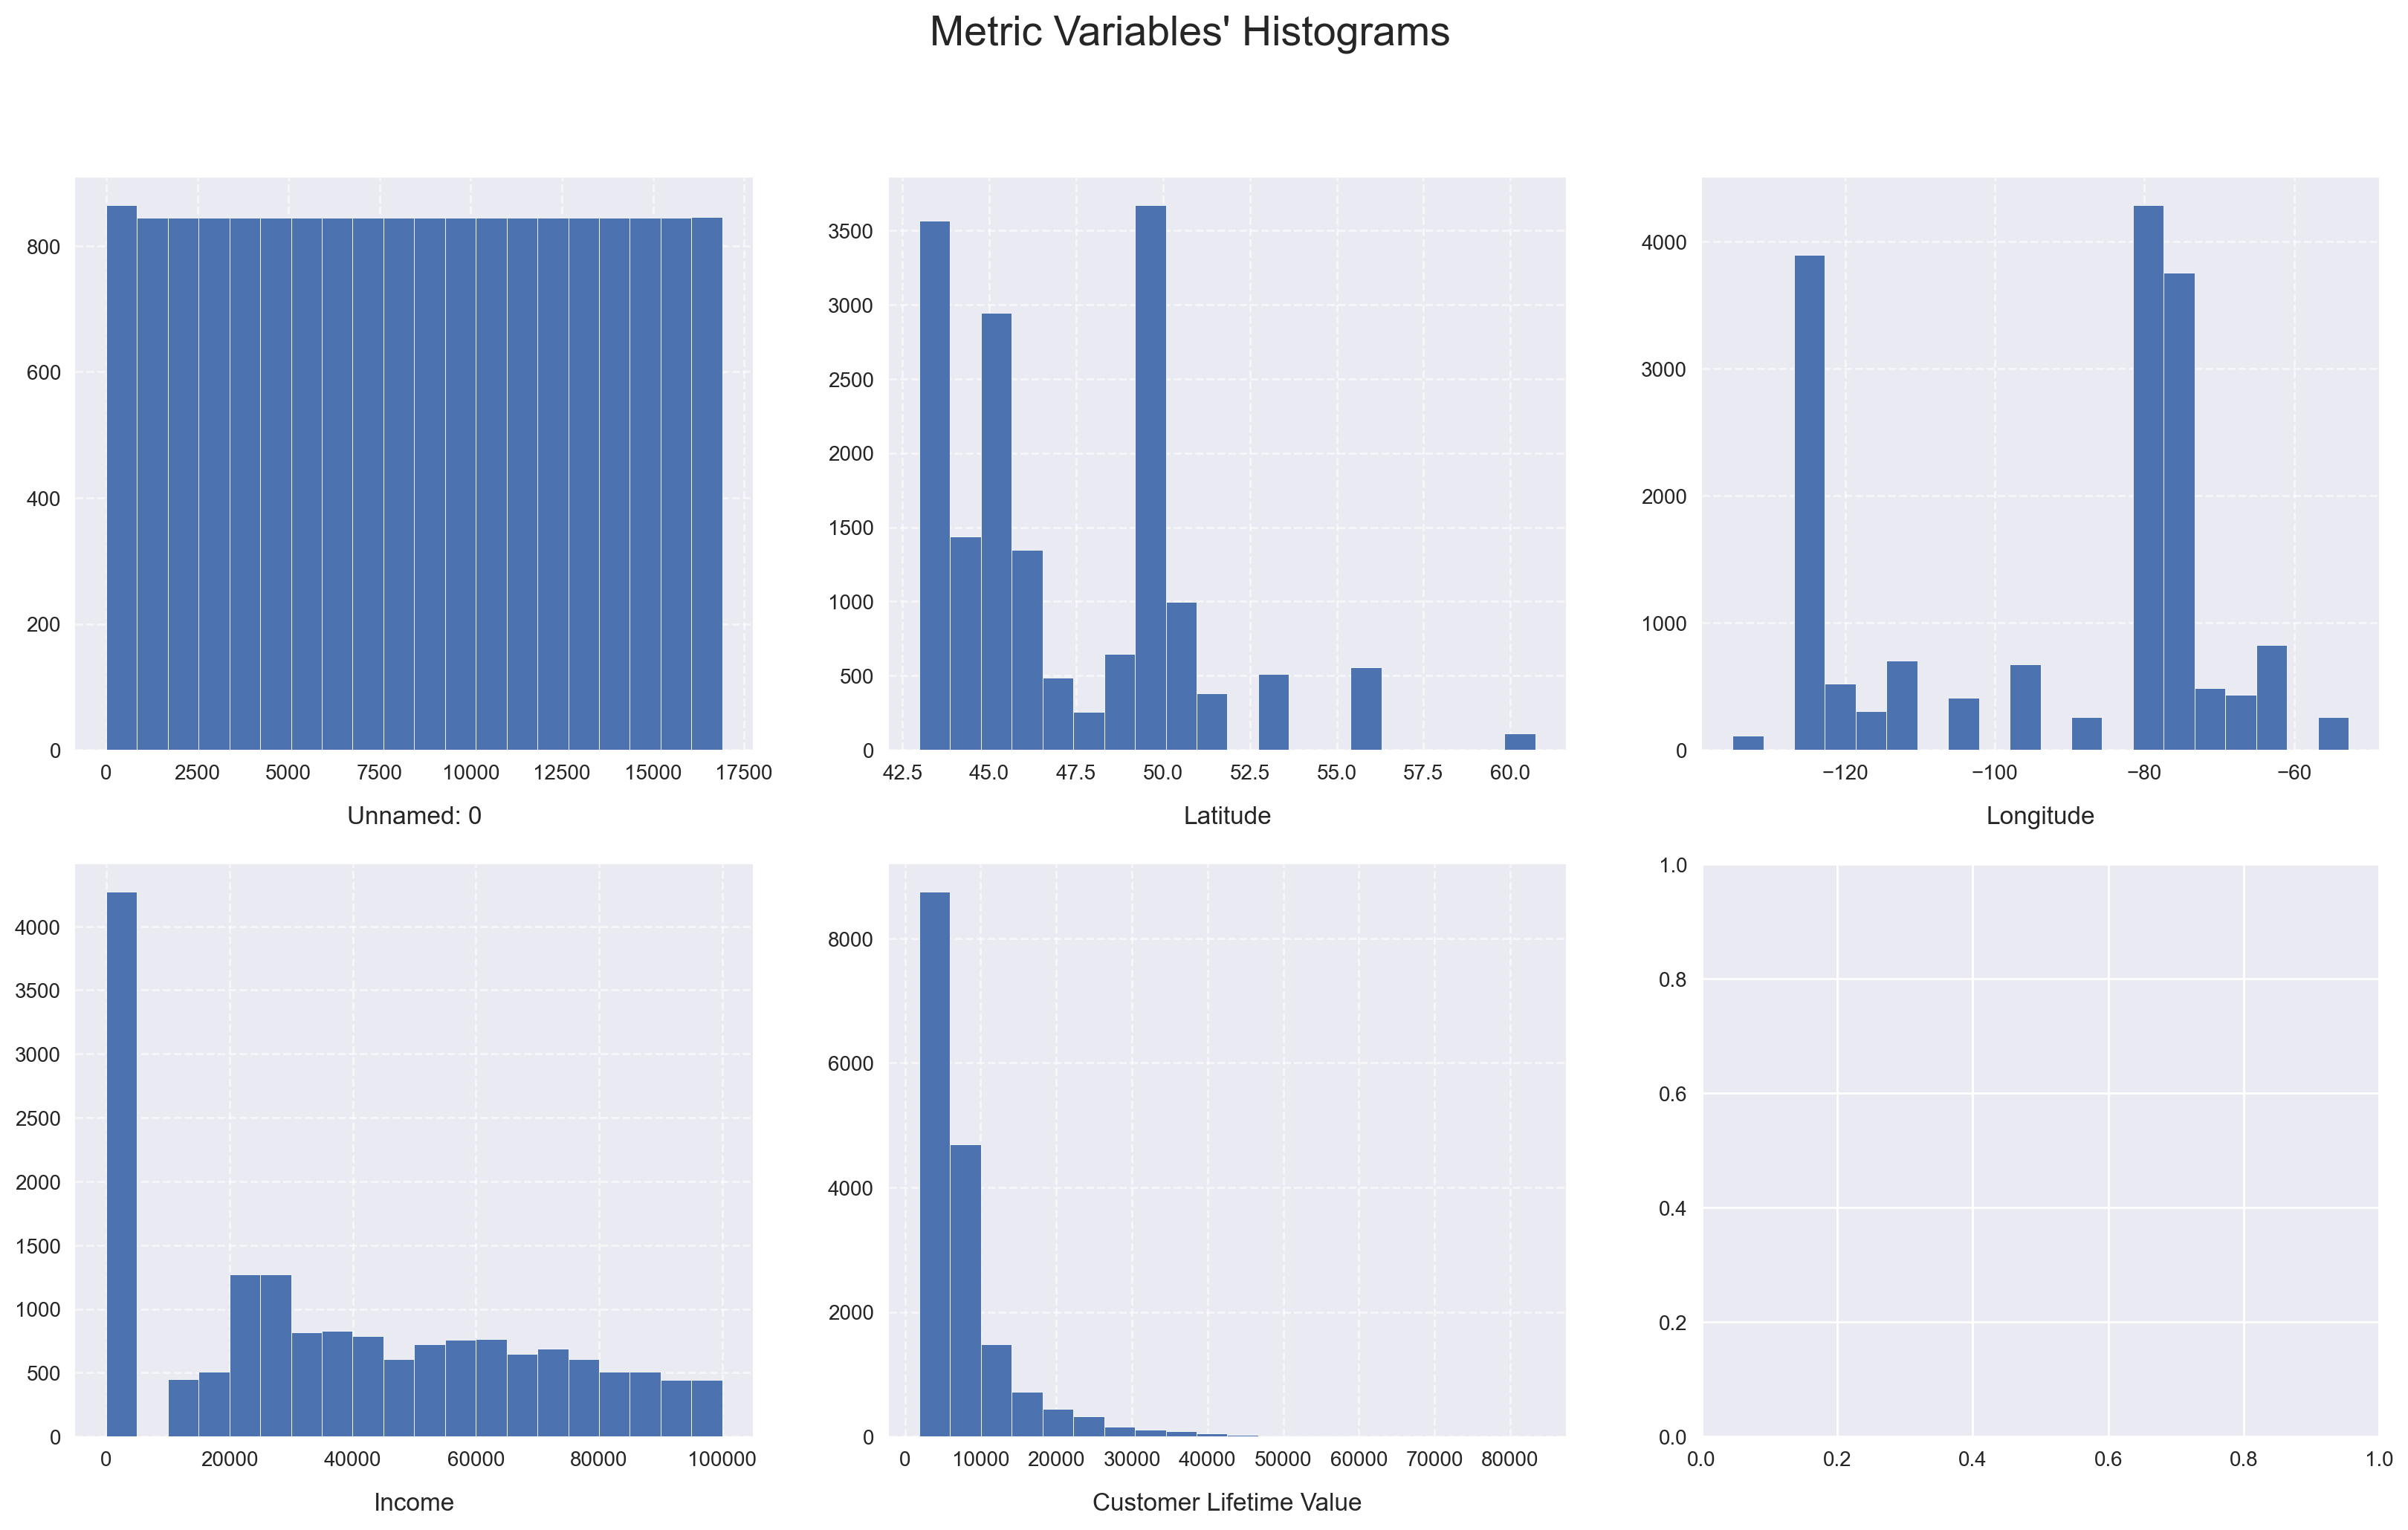

In [25]:
# Create a canvas for 5 metric features
sp_rows = 2
sp_cols = ceil(len(metric_features_CDB) / sp_rows) # adapts the number of columns to the number of features

fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot the data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), metric_features_CDB):
    ax.hist(customerDB[feat], bins=20, color="#4C72B0", edgecolor="white")
    ax.set_title(feat, y=-0.15)
    ax.grid(True, linestyle="--", alpha=0.6)
    
# Layout
# Add title
plt.suptitle("Metric Variables' Histograms", fontsize = 20)

# Check if folder 'figures/eda' exists and, if not, create it
if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    os.makedirs(os.path.join('..', 'figures', 'eda'))
    
# Save figure to a png file in the folder created before
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

# plt.style.use("bmh")
# usar um estilo que faça sentido
# print(plt.style.available) para ver todos os estilos que existem
plt.style.use("seaborn-v0_8")

plt.show()



**Unnamed** should be removed since it's just a sequential number for each row and does not have any predictive power.

**Latitude** right skewed?

**Longitude** 

Regarding **Income**, we can already see 2 distinct groups of customers

**Customer Lifetime Value** right skewed

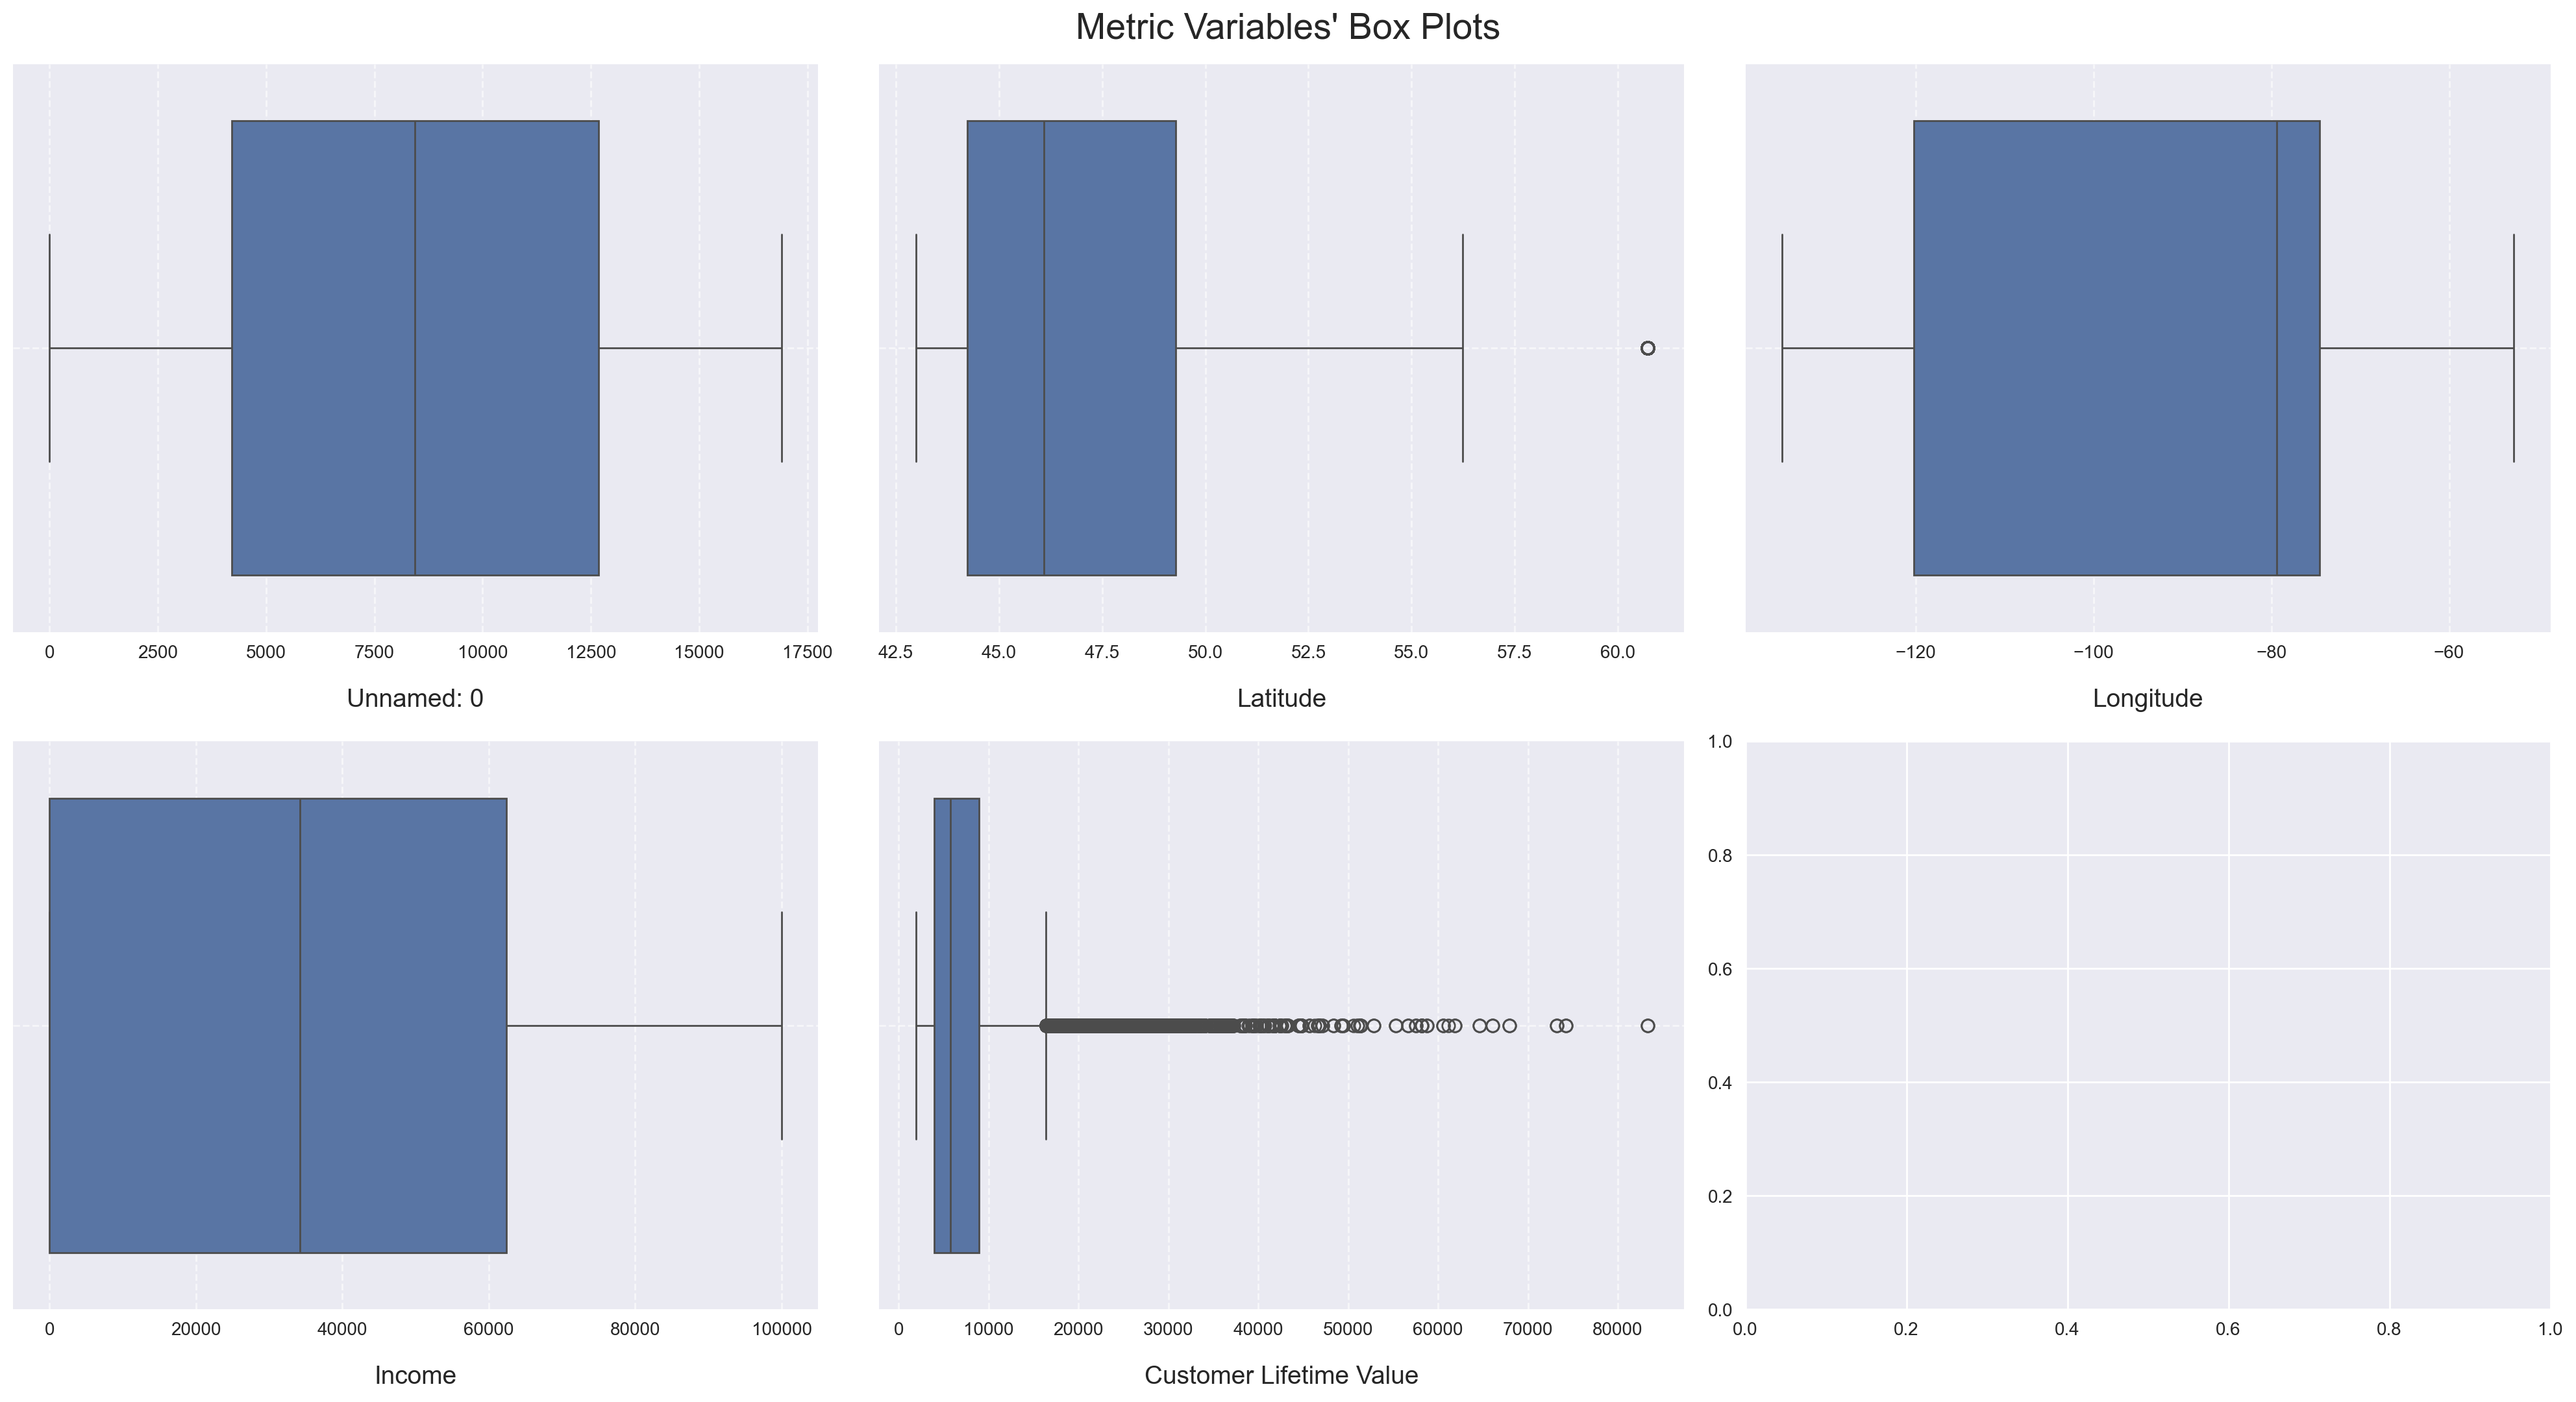

In [18]:
# Create canvas with the same structure as before
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features_CDB):
    sns.boxplot(x=customerDB[feat].reset_index(drop= True), ax=ax) # we need to reset the index to avoid errors since we haven't dealt with duplicate values
    ax.grid(True, linestyle="--", alpha=0.6, )
    ax.set_title(feat, fontsize=14, y=-0.15)
    ax.set_xlabel("") 

# Layout
# Add a centered title to the figure and plot it
plt.suptitle("Metric Variables' Box Plots", fontsize = 20)


# Check if folder 'figures/eda' exists and, if not, create it
if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    os.makedirs(os.path.join('..', 'figures', 'eda'))
    
# Save figure to a png file in the folder created before
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

plt.show()

## Descriptive Statistics and Visualisations (FlightsDB)

In [19]:
non_metric_features_FDB = ["YearMonthDate"]
metric_features_FDB = flightsDB.columns.drop(non_metric_features_FDB).to_list()

print("Metric Features:")
for i, feature in enumerate(metric_features_FDB, 1):
    print(f" {i}. {feature}")

print("\nNon-Metric Features:")
for i, feature in enumerate(non_metric_features_FDB, 1):
    print(f" {i}. {feature}")

Metric Features:
 1. Year
 2. Month
 3. NumFlights
 4. NumFlightsWithCompanions
 5. DistanceKM
 6. PointsAccumulated
 7. PointsRedeemed
 8. DollarCostPointsRedeemed

Non-Metric Features:
 1. YearMonthDate


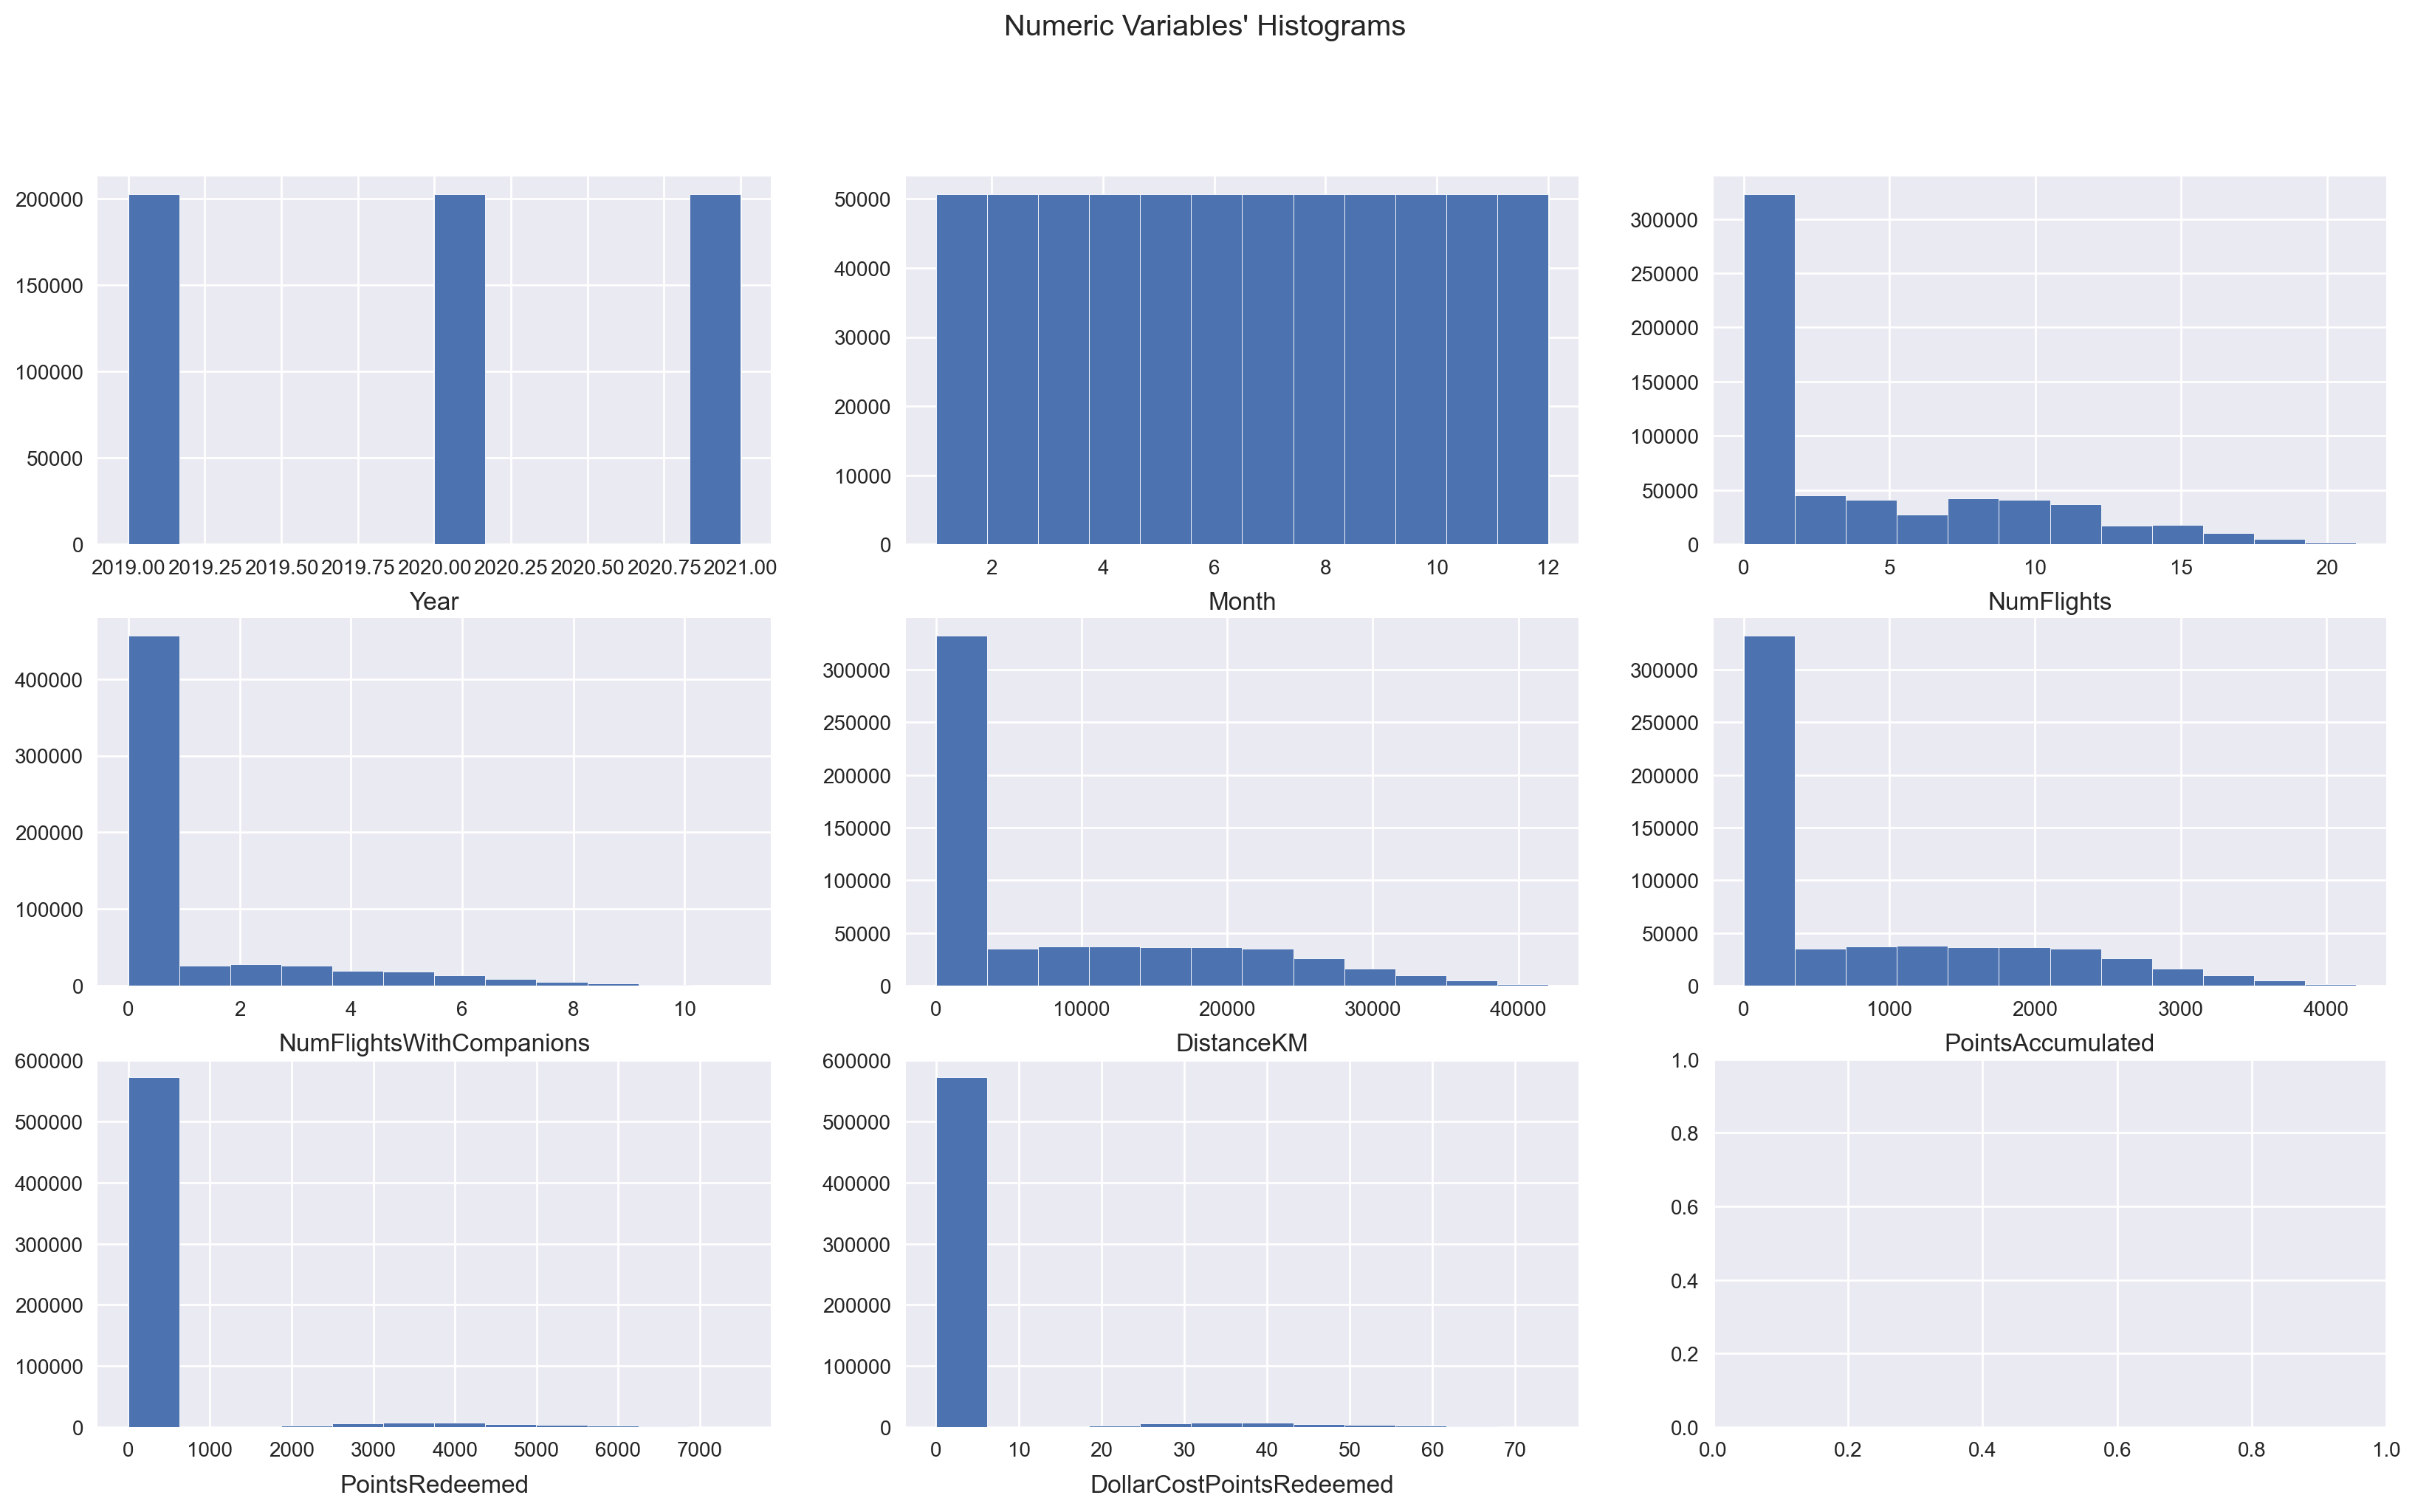

In [ ]:
sp_rows = 3
sp_cols = 3

fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features_FDB):
    ax.hist(flightsDB[feat], bins=12) # 12 bins to accomodate the feature 'month' and because no interpretability in the other graphs is lost
    ax.set_title(feat, y=-0.21)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))
    
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

plt.show()



**Year and Month** show even distributions of values, so we conclude they are irrelevant for segmentation.

**NumFlights** is very right-skewed, which tells us most customers take 1-2 flights per month.

**NumFlightsWithCompanions** is also very right-skewed, meaning most customers fly alone.

**DistanceKM and PointsAccumulated** are very right-skewed. The histograms are identical which suggests these 2 features will have a high correlation. This is expected because customers earn points based on distance travelled.

**PointsRedeemed and DolarCostPointsRedeemed** should also have a high correlation since there is a relationship between both variables. It seems that most values fall under the first bin and there are a few outliers.


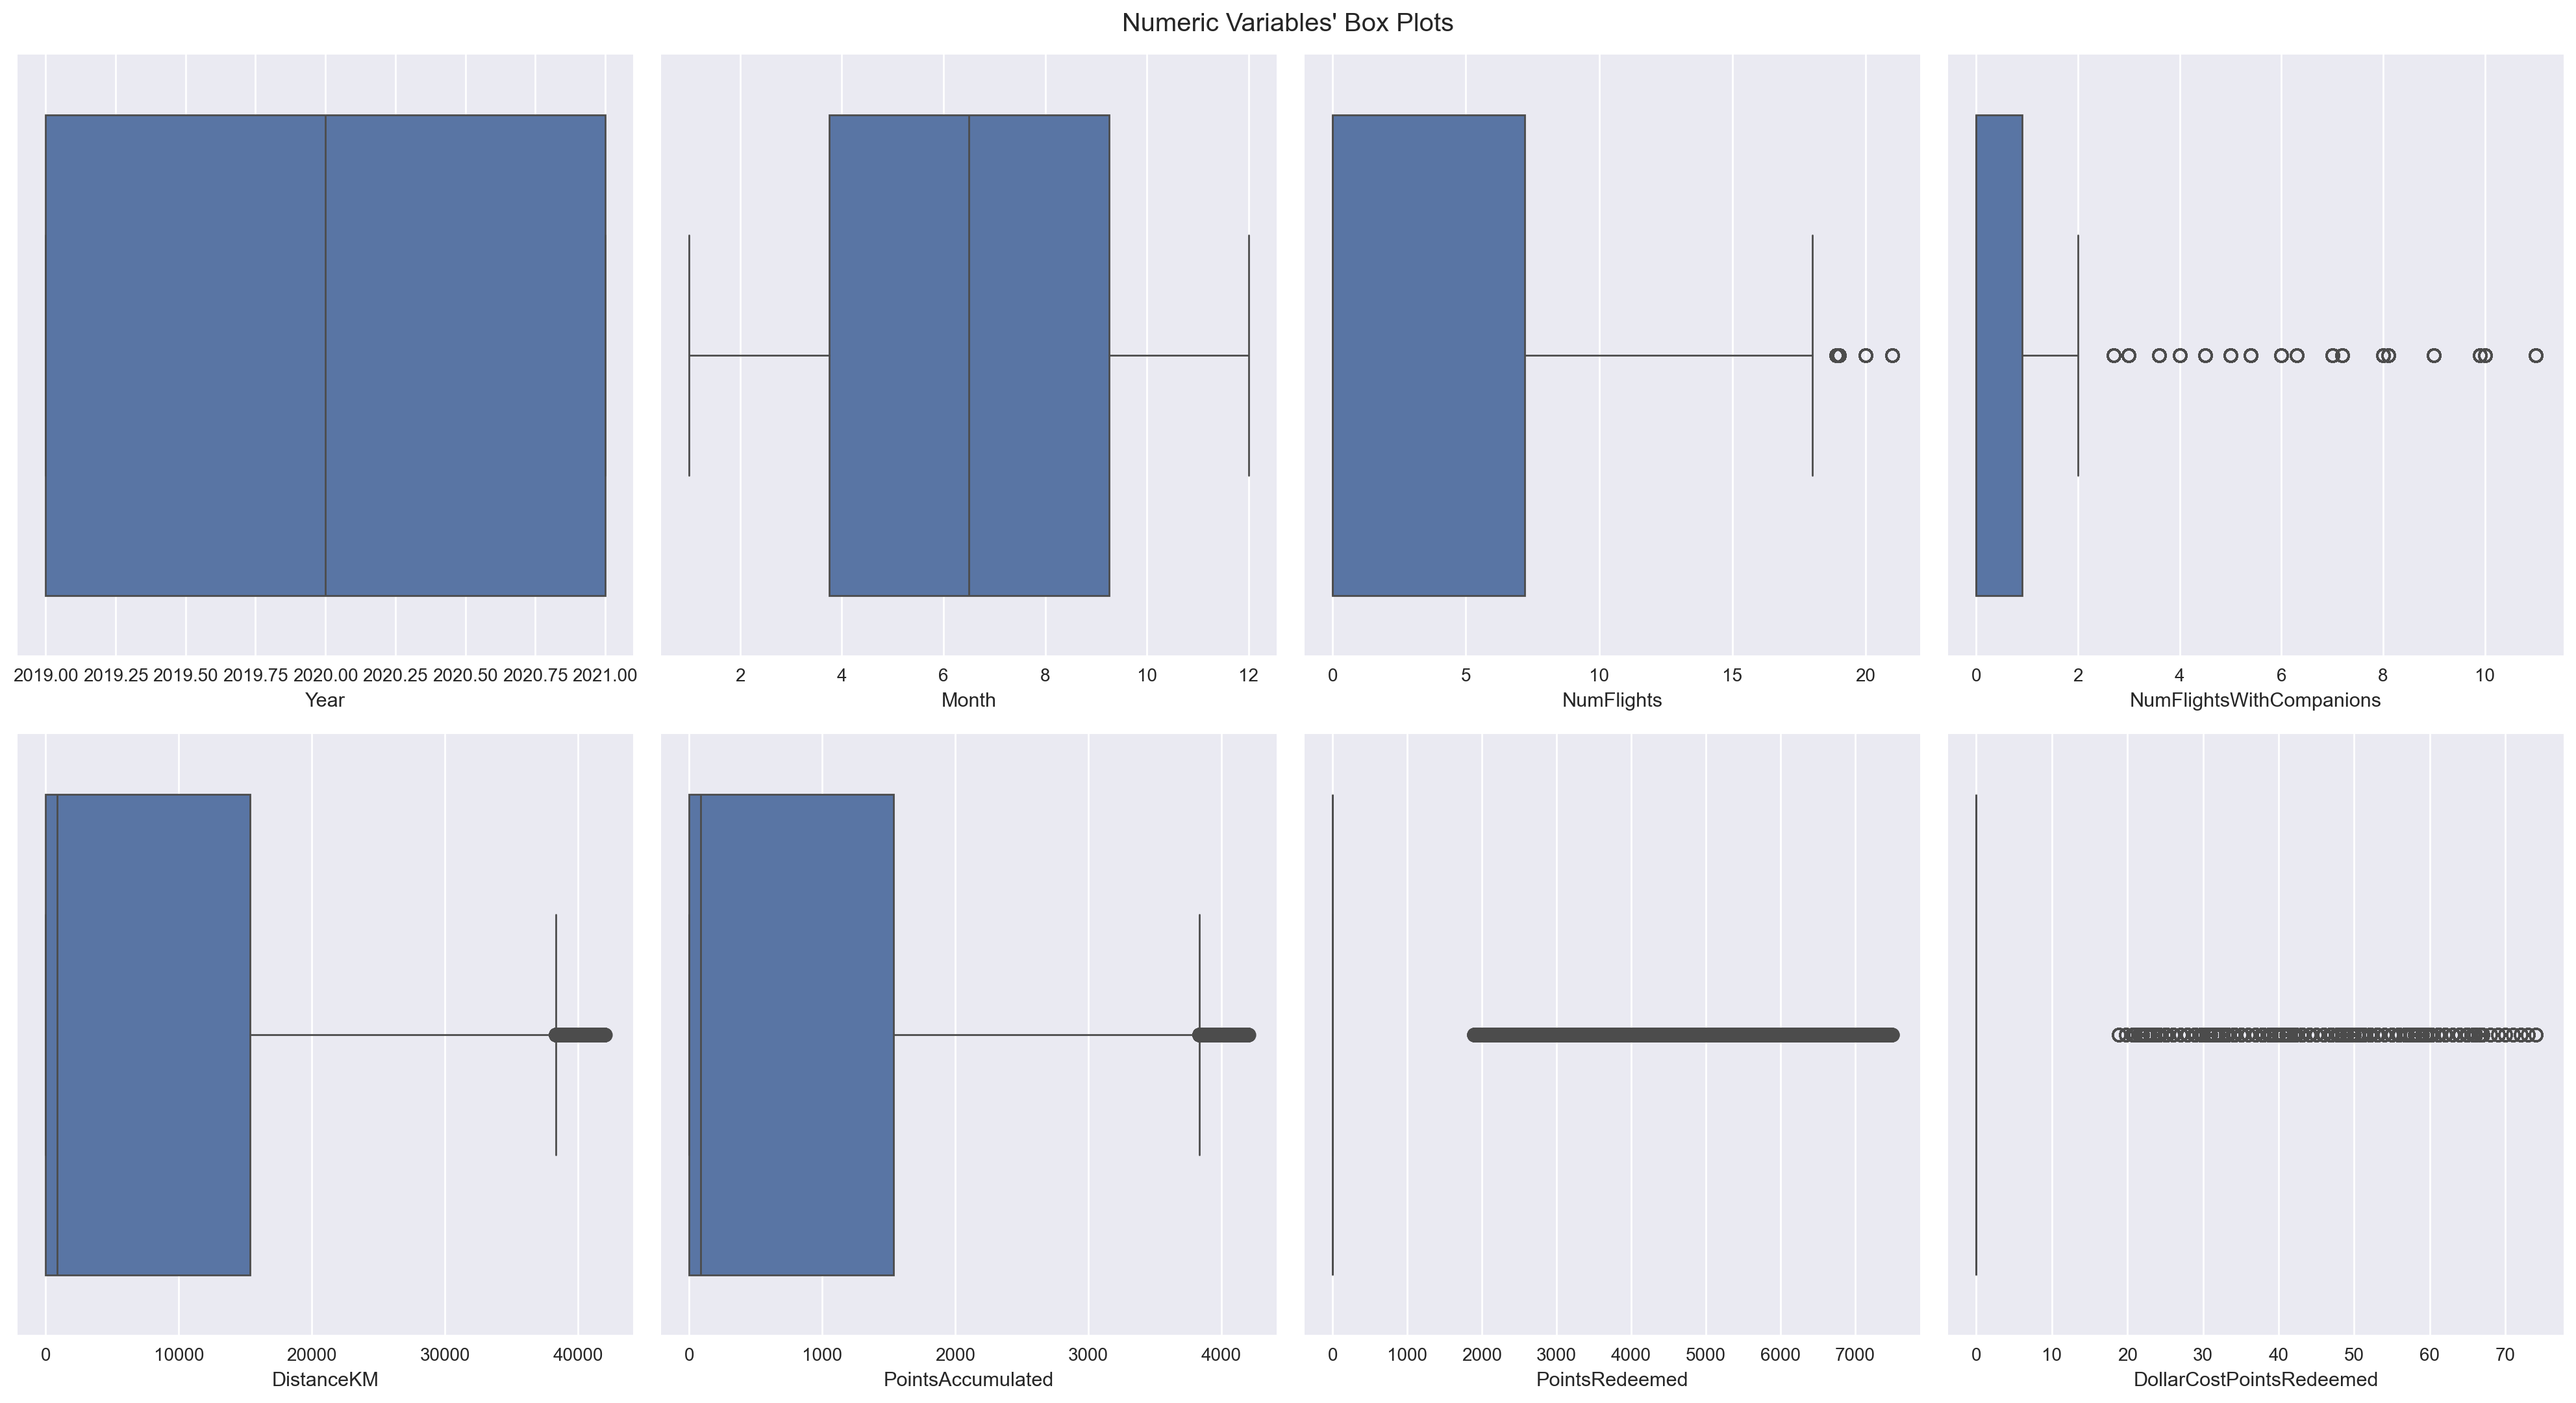

In [23]:
## What do these do?
sp_rows = 2
sp_cols = ceil(len(metric_features_FDB) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=False
                        )

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features_FDB): # Notice the zip() function and flatten() method
    sns.boxplot(x=flightsDB[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the eda directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))


plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)


plt.show()

### General Look at the Flight DataSet

In [ ]:
flightsDB.shape

In [12]:
flightsDB.head(15)


,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
Loyalty#,,,,,,,,,
413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.0,0.0,0.0
464105,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.0,0.0,0.0
185013,2021,12,12/1/2021,16.0,4.0,26311.0,2631.0,3213.0,32.0
216596,2021,12,12/1/2021,9.0,0.0,19275.0,1927.0,0.0,0.0
486956,2021,12,12/1/2021,12.0,7.0,23967.0,2396.0,0.0,0.0
247514,2021,12,12/1/2021,17.0,7.0,23029.0,2302.0,0.0,0.0
711864,2021,12,12/1/2021,6.0,0.0,25995.0,2599.0,0.0,0.0
721372,2021,12,12/1/2021,11.0,3.0,30758.0,3075.0,0.0,0.0


In [ ]:
flightsDB.tail(15)

From the visualization of the head and tail of the data base we can already understand that some errors exist:

    - NumFlights and NumFlightsWithCompanions as floats...
    - PointsAccumulated and PointsRedeemed as floats. Should they be integers?
We will further analyse this using describe and info.


In [ ]:
flightsDB.info()

From info we can see that:

    - NumFlights and NumFlightsWithCompanions as floats...
    - PointsAccumulated and PointsRedeemed as floats. Should they be integers? 
    - There aren't missing values

What will we do?

    Analyse with describe to have a different view

In [ ]:
#To confirm that missing values don't exist
flightsDB.replace("", np.nan, inplace=True)
flightsDB.isna().sum()

In [ ]:
flightsDB.describe().T

In [ ]:
flightsDB.describe(include='object')

#o "top" é a moda e "freq" é a frequencia do valor mais frequente
#"unique" é a quantidade de valores unicos ((36 datas diferentes pq é o primeiro dia de cada mês durante 3 anos))
#"count" é o numero de valores nao nulos

From both numeric and categorical describe we don't notice any weird value.

In [ ]:
# flightsDB.dtypes

#### Check Duplicate Values

In [19]:
#Check how many duplicates exist
flightsDB.duplicated().sum()

np.int64(301411)

In [20]:
#Visualize our duplicates
flightsDB[flightsDB.duplicated()]

,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
Loyalty#,,,,,,,,,
762715,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
332716,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
904920,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
671534,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
618871,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
999788,2019,12,12/1/2019,0.0,0.0,0.0,0.0,0.0,0.0
999891,2019,12,12/1/2019,0.0,0.0,0.0,0.0,0.0,0.0
999911,2019,12,12/1/2019,0.0,0.0,0.0,0.0,0.0,0.0


From this visualization we understand that all the rows considered as duplicates have one unique different value for the Loyalty# feature.

In [ ]:
#check the percentage of duplicates in our DataFrame
flightsDB.duplicated().sum() / len(flightsDB) * 100

!!!!    The percentage of duplicates ir almost 50%    !!!!

Because of this we understand that having Loyalty# as an index can be a wrong approach so we create a new variable with the Loyalty# as a feature to check again the duplicates considering this feature.

In [22]:
flightsDB_with_lyt = pd.read_csv('DM_AIAI_FlightsDB.csv', sep = ",")
flightsDB_with_lyt.duplicated().sum()

np.int64(2903)

In [ ]:
#queremos visualizar os duplicado ??? está mal
flightsDB_with_lyt[flightsDB_with_lyt.duplicated(keep=False)]

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
450,727091,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
535,369638,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
762,750578,2020,6,6/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
941,547522,2020,6,6/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
952,819842,2020,6,6/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
607696,960050,2019,12,12/1/2019,0.0,0.0,0.0,0.0,0.0,0.0
608110,981508,2019,12,12/1/2019,0.0,0.0,0.0,0.0,0.0,0.0
608111,981508,2019,12,12/1/2019,0.0,0.0,0.0,0.0,0.0,0.0
608263,990512,2019,12,12/1/2019,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
flightsDB_with_lyt.duplicated().sum() / len(flightsDB_sem_indice) * 100

From the new calculation we obtain only 0.48% of duplicated which it makes more sense in our problem.

With this value we can decide to drop the duplicates 

In [ ]:
flightsDB_with_lyt[flightsDB_with_lyt["Loyalty#"] == 263267]
#Here we check that there are duplicates for the Loyalty# number 263267
#the DataFrame below show us all the Data associated to this Loyalty number and we can see that some rows have the exactly same information


72 rows iguais, ou seja, todos os 36 unique values estão duplicados.

# General Look at the Customer DataSet

In [5]:
customerDB.shape

(16921, 20)

In [8]:
customerDB.head(10)

,Unnamed: 0,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
Loyalty#,,,,,,,,,,,,,,,,,,,,
480934,0,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
549612,1,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
429460,2,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
608370,3,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
530508,4,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion
193662,5,Leatrice,Hanlin,Leatrice Hanlin,Canada,Yukon,Whitehorse,60.721188,-135.056840,Y2K 6R0,male,Bachelor,Rural,26262.0,Married,Star,5/7/2015,NaN,3844.57,Standard
927943,6,Hue,Sellner,Hue Sellner,Canada,Ontario,Toronto,43.653225,-79.383186,P5S 6R4,female,College,Urban,0.0,Single,Star,6/9/2017,NaN,3857.95,Standard
188893,7,Nakia,Cash,Nakia Cash,Canada,Ontario,Trenton,44.101128,-77.576309,K8V 4B2,male,Bachelor,Suburban,93272.0,Married,Star,12/8/2019,NaN,3861.49,Standard
852392,8,Arlene,Conterras,Arlene Conterras,Canada,Quebec,Montreal,45.501690,-73.567253,H2Y 2W2,female,Bachelor,Suburban,93272.0,Married,Star,5/30/2018,NaN,3861.49,Standard


In [10]:
customerDB.tail(20)

,Unnamed: 0,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
Loyalty#,,,,,,,,,,,,,,,,,,,,
999987,0,Layla,Murphy,Layla Murphy,Canada,New Brunswick,Fredericton,46.029263,-66.565150,R4H 2Y2,female,Bachelor,Urban,NaN,Single,Star,3/7/2017,3/7/2017,NaN,Standard
999988,1,Jana,Parker,Jana Parker,Canada,Quebec,Montreal,45.573672,-73.523012,N6B 1N3,male,College,Rural,NaN,Single,Star,8/22/2017,8/22/2017,NaN,Standard
999989,2,Ethan,Parker,Ethan Parker,Canada,Ontario,Trenton,44.075379,-77.550375,P8F 5C8,male,College,Rural,NaN,Married,Star,9/12/2015,9/12/2015,NaN,Standard
999990,3,Ryan,Anderson,Ryan Anderson,Canada,New Brunswick,Moncton,46.106617,-64.714267,B6P 6D0,female,College,Rural,NaN,Married,Star,6/10/2019,6/10/2019,NaN,Standard
999991,4,Olivia,Cote,Olivia Cote,Canada,New Brunswick,Fredericton,45.950000,-66.652437,X3W 5N2,female,College,Suburban,NaN,Married,Star,7/20/2019,7/20/2019,NaN,Standard
999992,5,Ella,Roy,Ella Roy,Canada,Ontario,Toronto,43.706878,-79.437412,P6D 6N2,male,College,Suburban,NaN,Single,Star,3/27/2021,3/27/2021,NaN,Standard
999993,6,Elijah,Cook,Elijah Cook,Canada,British Columbia,Dawson Creek,55.701475,-120.181716,W6H 0Z7,female,College,Suburban,NaN,Married,Star,1/27/2015,1/27/2015,NaN,Standard
999994,7,Ethan,Chan,Ethan Chan,Canada,Ontario,Ottawa,45.365906,-75.723181,B2F 3E1,female,College,Rural,NaN,Married,Star,5/5/2016,5/5/2016,NaN,Standard
999995,8,Liam,Wong,Liam Wong,Canada,Ontario,Ottawa,45.471557,-75.704868,B3A 2R0,female,College,Suburban,NaN,Married,Star,3/2/2020,3/2/2020,NaN,Standard


From the visualization of the head and tail of the data base we can already understand that some errors exist:

    - A column named 'Unnamed' as an index with the number of each row
    - Missing values in some features
    - EnrollmentType as "2021 Promotion" when it's suppose to be a type
We will further analyse this using describe and info.

It's also possible to see that some variables are redundante, such as Costumer Name, First Name and Last Name
To solve this problem we will uniformize all the values in data preparation

In [11]:
customerDB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16921 entries, 480934 to 100016
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               16921 non-null  int64  
 1   First Name               16921 non-null  object 
 2   Last Name                16921 non-null  object 
 3   Customer Name            16921 non-null  object 
 4   Country                  16921 non-null  object 
 5   Province or State        16921 non-null  object 
 6   City                     16921 non-null  object 
 7   Latitude                 16921 non-null  float64
 8   Longitude                16921 non-null  float64
 9   Postal code              16921 non-null  object 
 10  Gender                   16921 non-null  object 
 11  Education                16921 non-null  object 
 12  Location Code            16921 non-null  object 
 13  Income                   16901 non-null  float64
 14  Marital Status       

From info we can see that:

    - missing values in Income, CustomerLifetimeValue, CancellationDate
* the missing values in the features Income can make sense in cases where customers do not want to share their personal annual income. Or they may also be input errors. (Depends on interpretation).

* We can also believe that it makes sense to have NaN values in “CancellationDate,” as this means that there are customers who have not left the program.

* For the “CustomerLifetimeValue” variable, we believe that it does not make sense to have NaN values because even if the customer has no value for the company, their CustomerLifetimeValue will be 0.

What will we do?

    Analyse with describe to have a different view

In [16]:
#To confirm that missing values exist
customerDB.replace("", np.nan, inplace=True)
customerDB.isna().sum()

Unnamed: 0                     0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

In [13]:
customerDB.describe()

,Unnamed: 0,Latitude,Longitude,Income,Customer Lifetime Value
count,16921.000000,16921.000000,16921.000000,16901.000000,16901.000000
mean,8440.023639,47.174500,-91.814768,37758.038400,7990.460188
std,4884.775439,3.307971,22.242429,30368.992499,6863.173093
min,0.000000,42.984924,-135.056840,0.000000,1898.010000
25%,4210.000000,44.231171,-120.237660,0.000000,3979.720000
50%,8440.000000,46.087818,-79.383186,34161.000000,5780.180000
75%,12670.000000,49.282730,-74.596184,62396.000000,8945.690000
max,16900.000000,60.721188,-52.712578,99981.000000,83325.380000


From the numerical describe we can see that:

    - Once again we have the column Unnamed that has no relevant values

From the rest of the infromation we can't find any other problem from the first look

In [15]:
customerDB.describe(include='object')

,First Name,Last Name,Customer Name,Country,Province or State,City,Postal code,Gender,Education,Location Code,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,EnrollmentType
count,16921,16921,16921,16921,16921,16921,16921,16921,16921,16921,16921,16921,16921,2310,16921
unique,4941,15404,16921,1,11,29,75,2,5,3,3,3,2449,1260,2
top,Deon,Salberg,Cecilia Householder,Canada,Ontario,Toronto,V6E 3D9,female,Bachelor,Suburban,Married,Star,4/3/2015,7/7/2020,Standard
freq,13,4,1,16921,5468,3390,917,8497,10586,5716,9842,7761,34,8,15773


From the object describe we can conclude that:

    - there are no repeted Customer Names (count = unique = 16921);
    - there's only one Country, Canada
    - other things that will be analysed latter if they are relevant

#### Check Duplicates

In [17]:
customerDB.duplicated().sum()

np.int64(0)

Checking the duplicates we verify that we don´t have any.

But it's still important to check the duplicates without the names features.

In [18]:
customerDB_no_name = customerDB.drop(columns=["First Name", "Last Name", "Customer Name"])
customerDB_no_name.duplicated().sum()

np.int64(0)

The result is the same so we can conclude that there aren't duplicated values in this DataFrame.

### Descriptive Statistics and Visualisations (FlightsDB)

This section starts by split our data in metric and non-metric features

In [25]:
non_metric_features_FDB = ["YearMonthDate"]
metric_features_FDB = flightsDB.columns.drop(non_metric_features_FDB).to_list()

print("Metric Features:")
for i, feature in enumerate(metric_features_FDB, 1):
    print(f" {i}. {feature}")

print("\nNon-Metric Features:")
for i, feature in enumerate(non_metric_features_FDB, 1):
    print(f" {i}. {feature}")

Metric Features:
 1. Year
 2. Month
 3. NumFlights
 4. NumFlightsWithCompanions
 5. DistanceKM
 6. PointsAccumulated
 7. PointsRedeemed
 8. DollarCostPointsRedeemed

Non-Metric Features:
 1. YearMonthDate


Now we do the histograms for each metric feature.

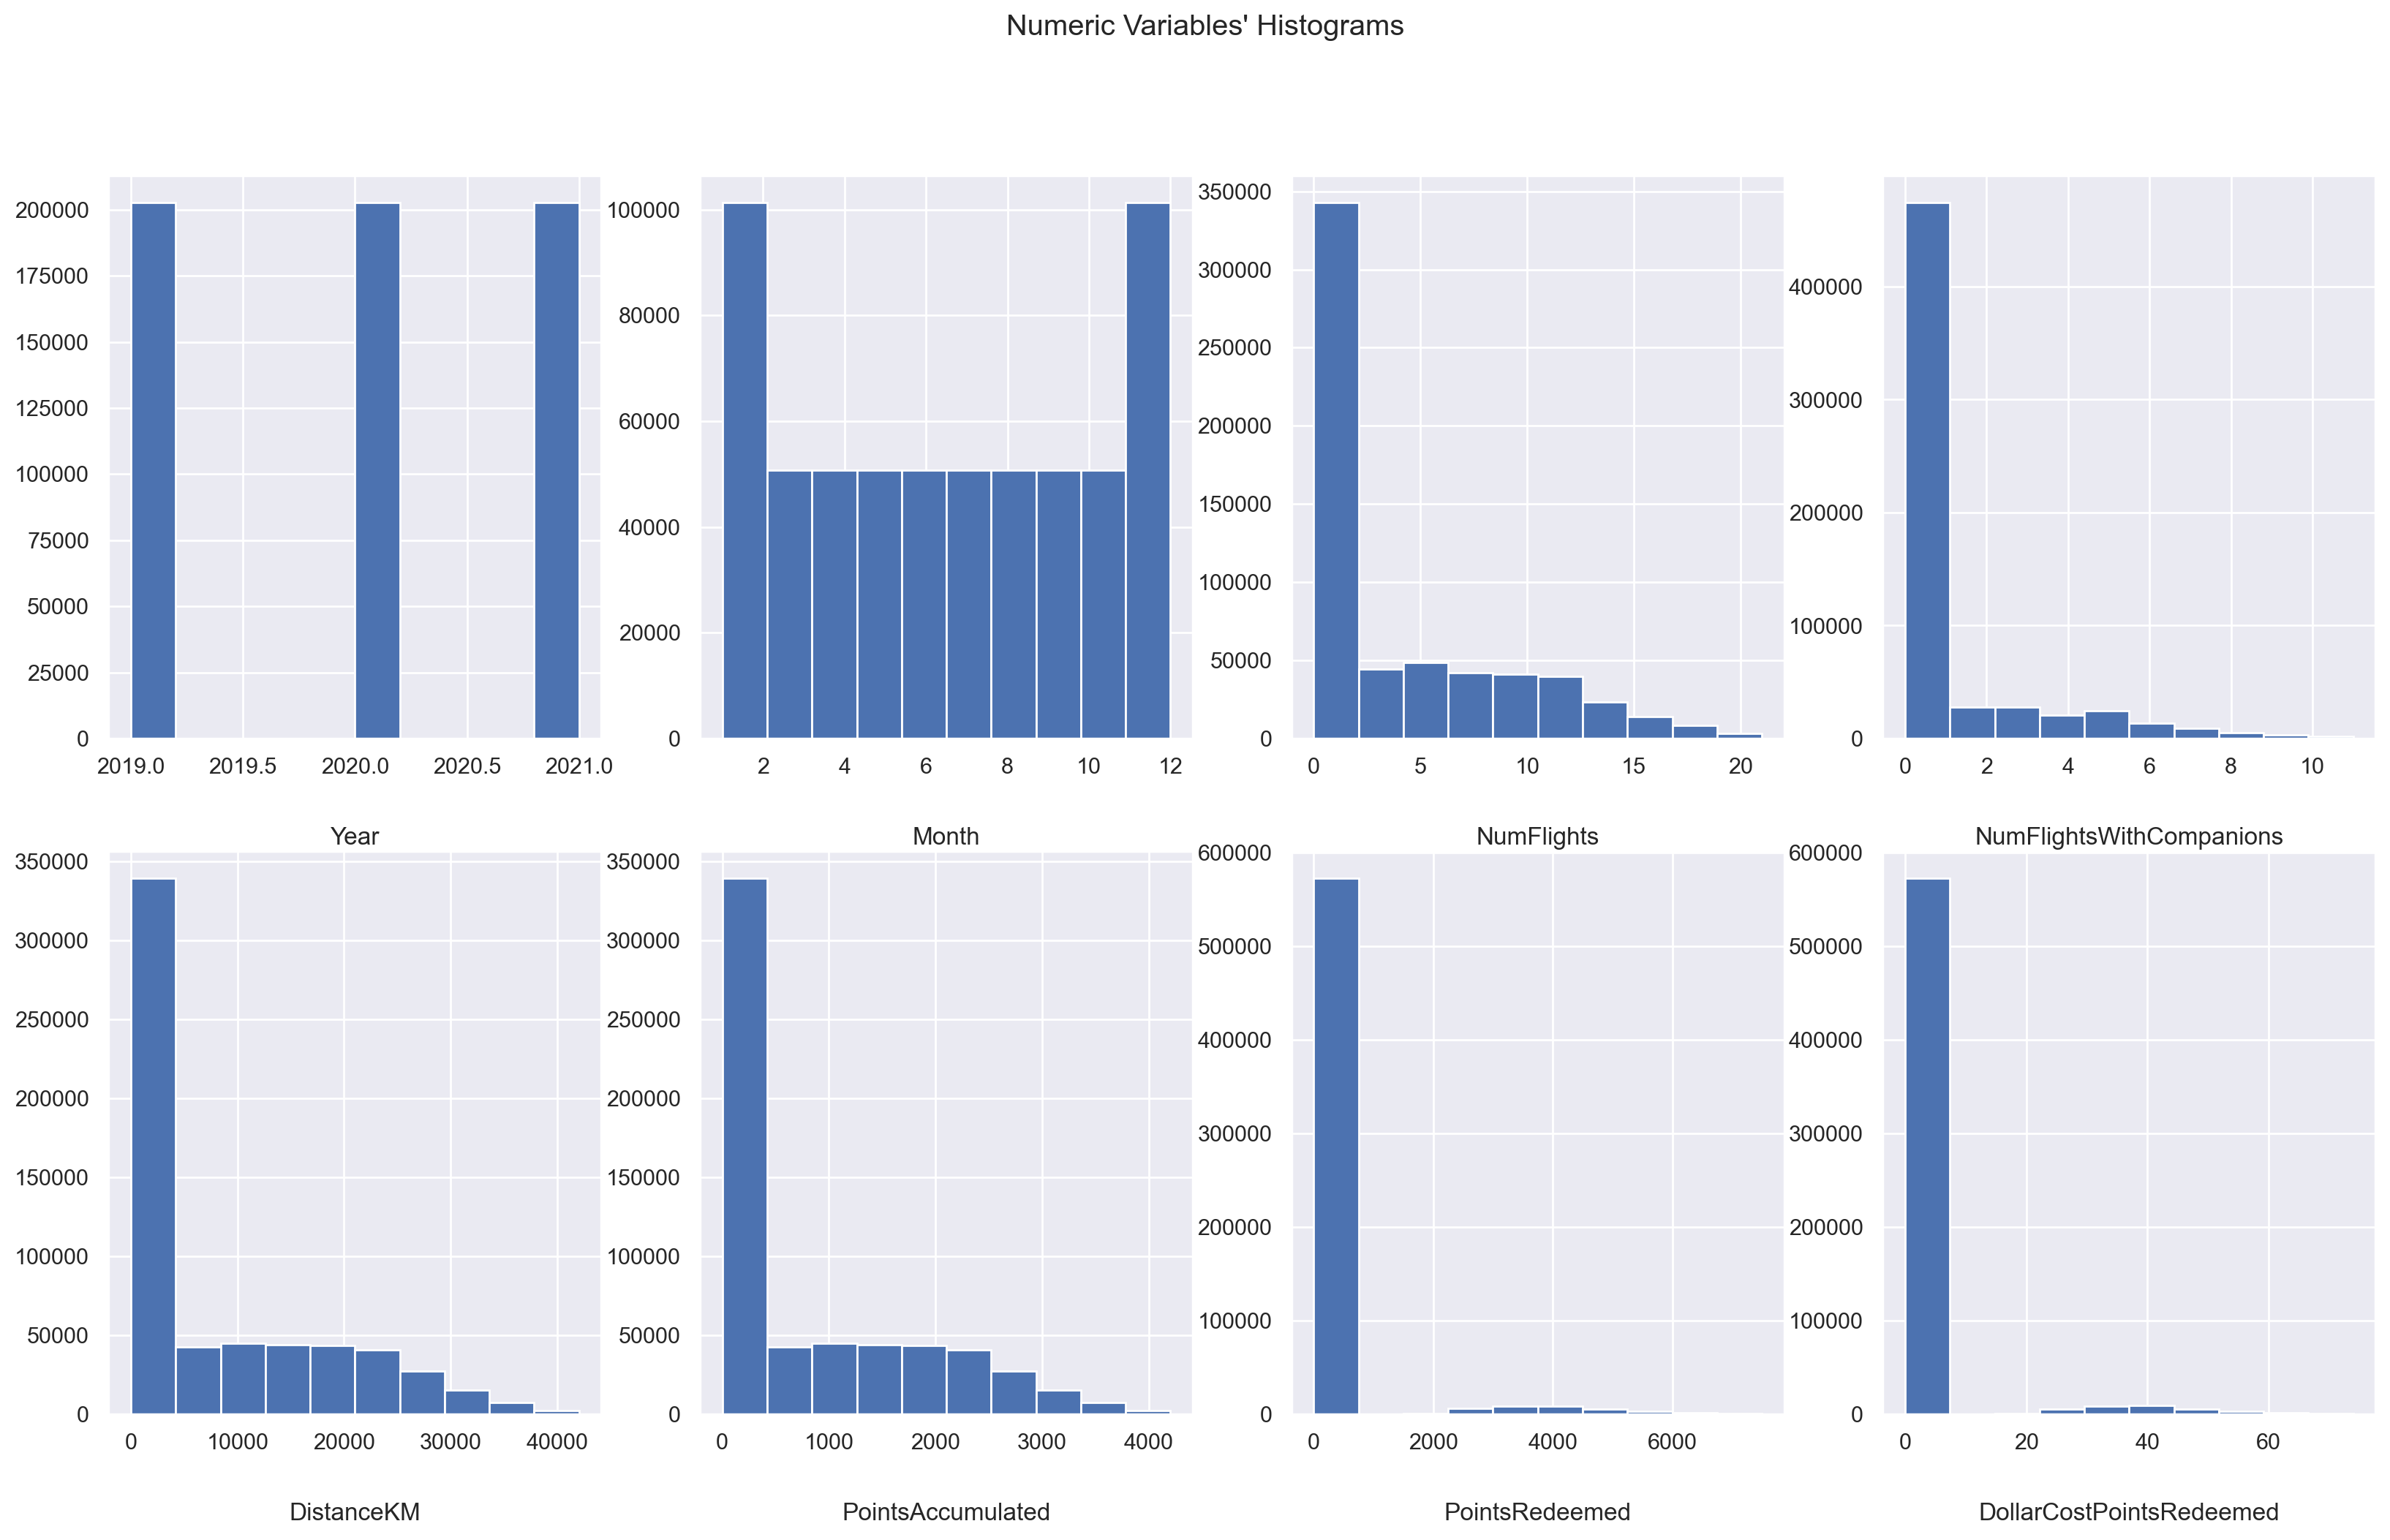

In [29]:
sp_rows = 2
sp_cols = 4

fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features_FDB): # Notice the zip() function and flatten() method
    ax.hist(flightsDB[feat])
    ax.set_title(feat, y=-0.21)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))
    
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

plt.show()



From the histograms above we can see that:

- `Year:` The data is distributed only between 2019 and 2021, indicating that the set covers three years of operations. The number of records is similar between years, suggesting consistency in data collection over time.
- `Month:` he frequency of the first few months and the last ones is higher than the middle months. Also, the middle months have all the same frequency, this is the distribution is almost uniform across this months;
- `Number of Flights and Flights with Companions:` Most customers make few trips (1 to 3 flights). Few customers travel frequently—they are the outliers;
- `Distance KM:` Most flights are short-haul. There are some long-haul flights that can represent the outliers;
- `Points Accumulated:` Only a few customers accumulate many points;
- `Points Redeemed:` Many customers do not redeem points or redeem very few;
- `Dollar Cost Points Redeemed:` The financial use of points is uncommon, this means only a few customers redeem points by converting them into cash. When they do, the amounts vary widely.

Now we do the boxplot for each metric feature.

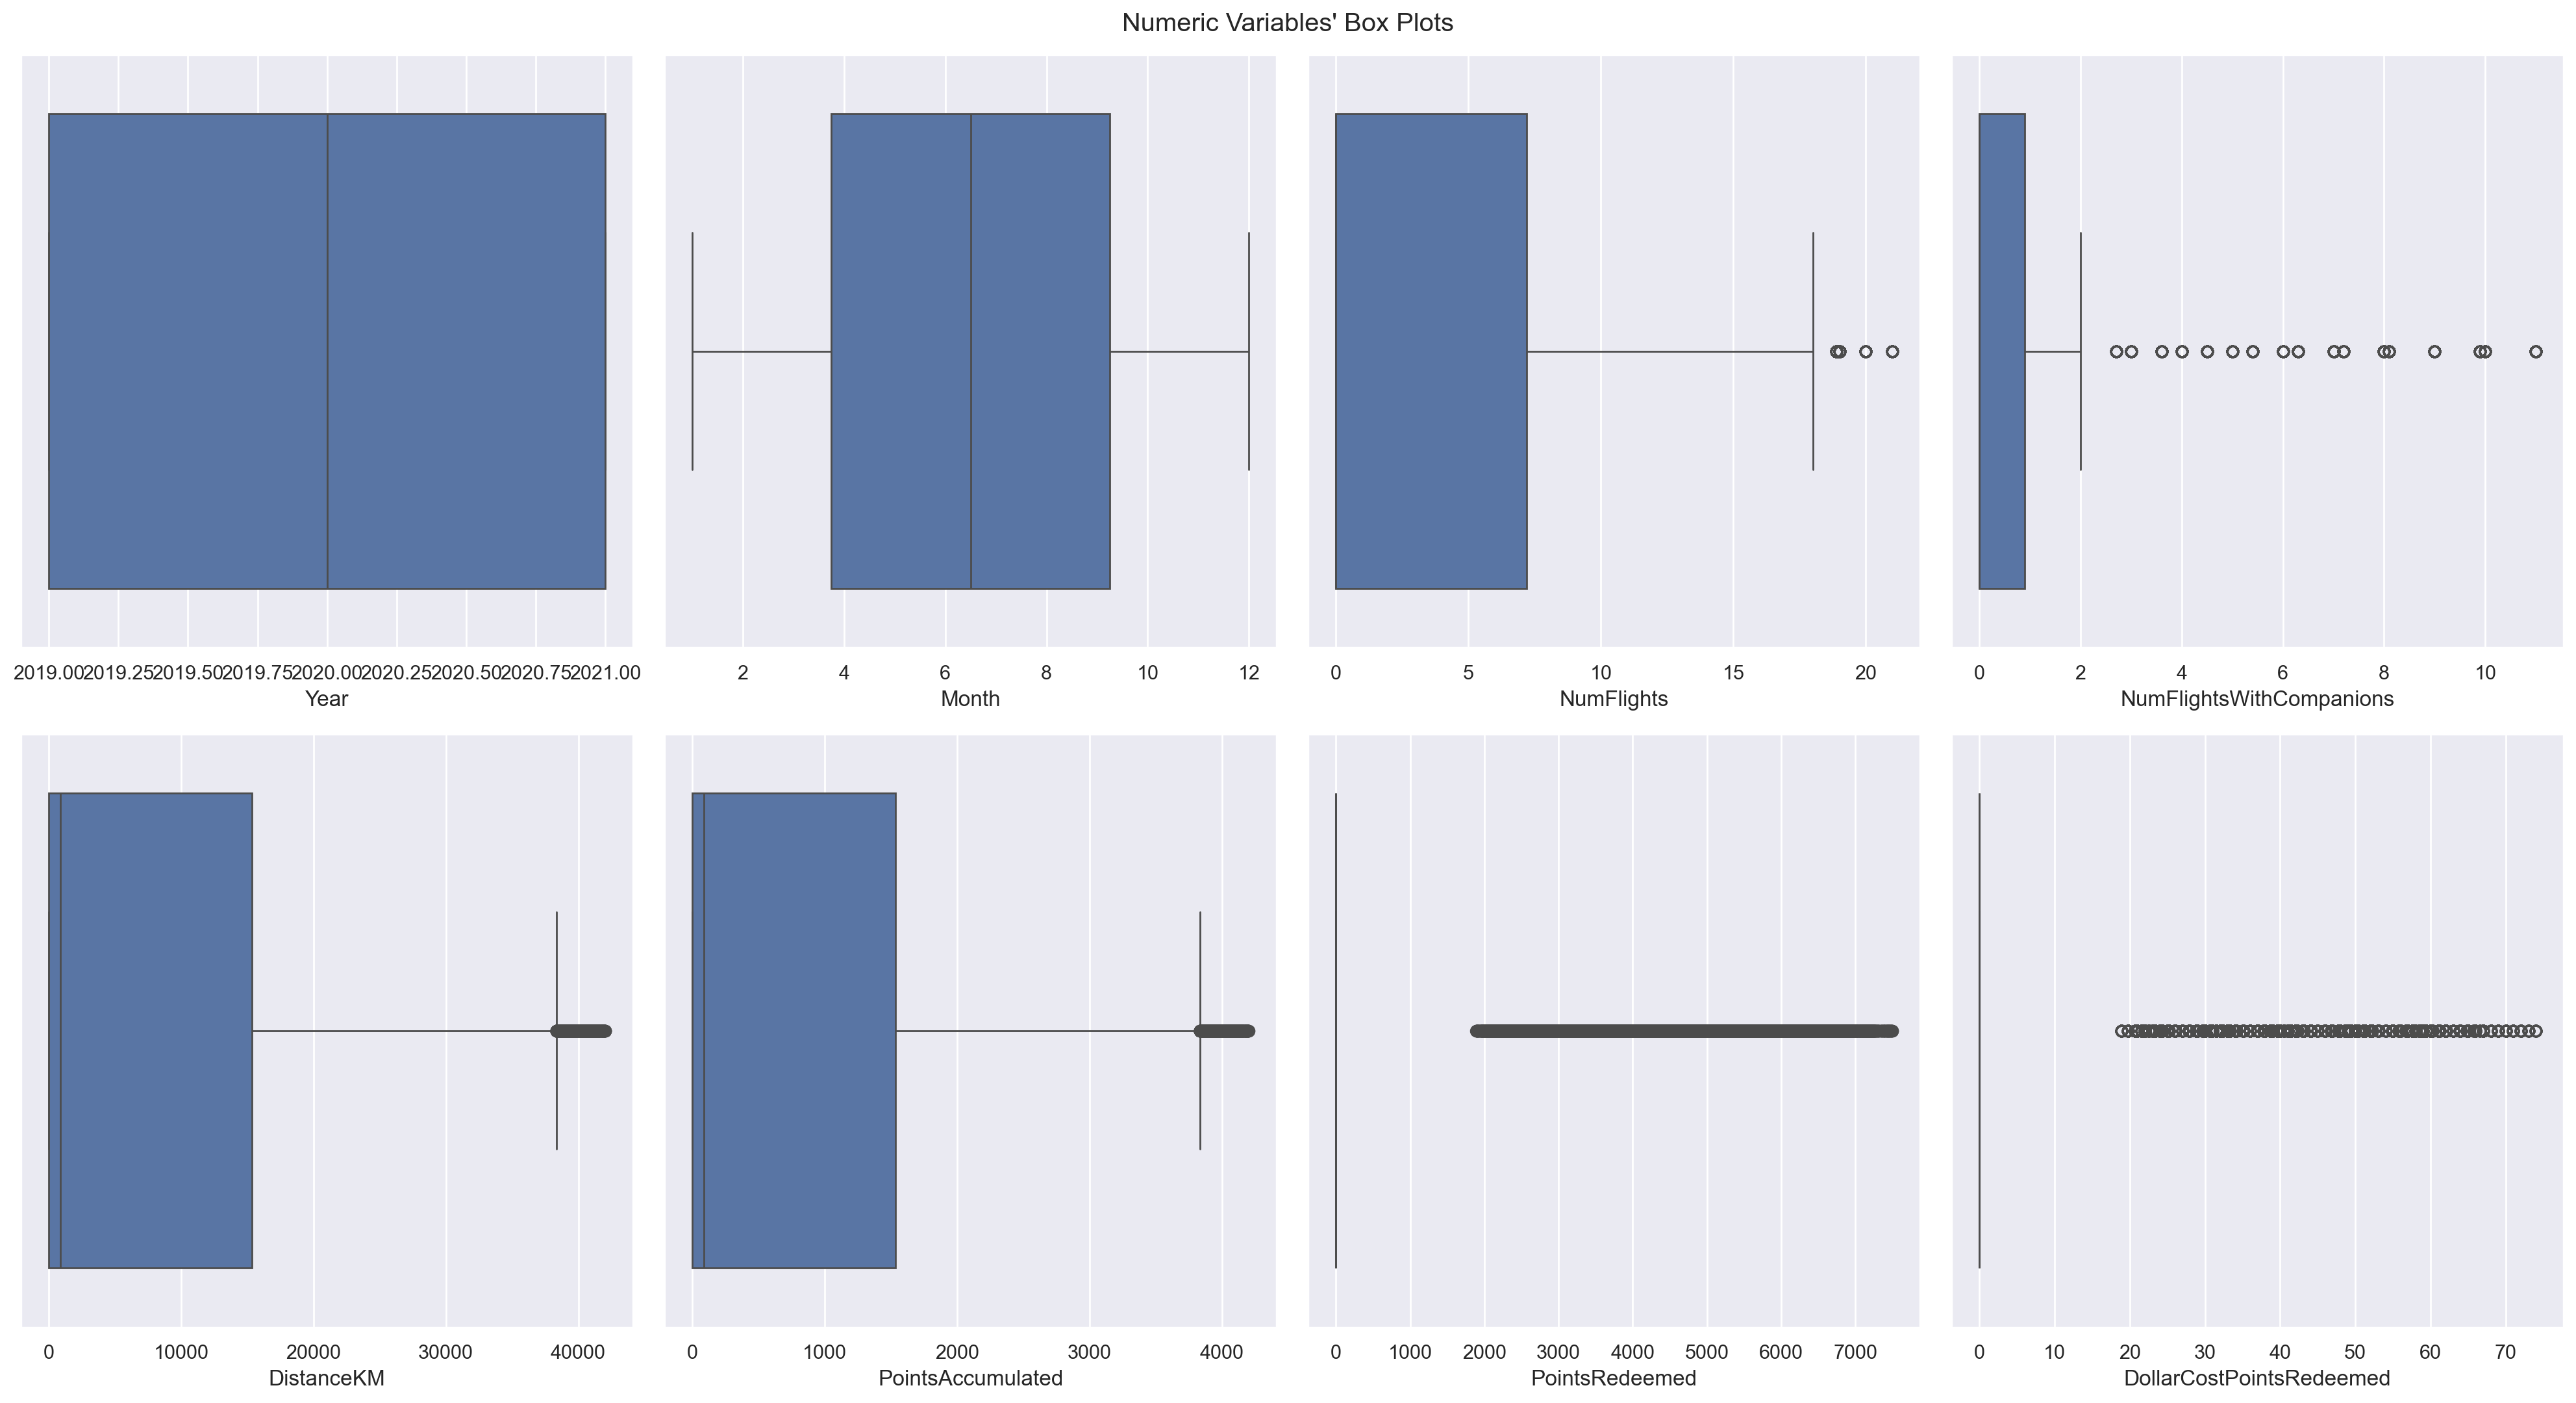

In [32]:
## What do these do?
sp_rows = 2
sp_cols = ceil(len(metric_features_FDB) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features_FDB): # Notice the zip() function and flatten() method
    sns.boxplot(x=flightsDB[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the eda directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))


plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)


plt.show()

From the graphics above we can conclude that:

- `Year:` The values are evenly distributed between 2019 and 2021, with no outliers;
- `Month:` The distribution is almost uniform, with slight asymmetry (probably more records in the first and last few months).
- `Number of Flights:` Low median and strong skew to the right (positive asymmetry). Many outliers above ~15 flights — few customers travel frequently;
- `Number of Flights with Companions:` Median close to 0, a lot of outliers that represent the clients that travel the most;
- `Distance KM:` large number of short flights and a few very long ones that greatly influence the average;
- `Points Accumulated:` Very low median and a lot of outliers. This means that only a few customers accumulate large volumes of points;
-`Points Redeemed:` The same as before, very low values with even more outliers;
- `Dollar Cost Points Redeemed:` The majority of values are close to 0 and many outliers what it means that almost no customer convert points in monetary value.

### Descriptive Statistics and Visualisations (CustomerDB)

Create 2 lists to differentiate from metric and non-metric features.

In [ ]:
metric_features_CDB = customerDB.select_dtypes(include=['number']).columns.tolist()
non_metric_features_CDB = customerDB.columns.drop(metric_features_CDB).to_list()

print("Metric Features:")
for i, feature in enumerate(metric_features_CDB, 1):
    print(f" {i}. {feature}")

print("\nNon-Metric Features:")
for i, feature in enumerate(non_metric_features_CDB, 1):
    print(f" {i}. {feature}")

Create histograms for a general analysis of the features

In [ ]:
sp_rows = 2
sp_cols = 2

fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(customerDB[feat])
    ax.set_title(feat, y=-0.17)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))
    
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

plt.show()



### Relação KM e Pontos (flights)

In [ ]:
flightsDB[["DistanceKM", "PointsAccumulated"]]

A cada 10km, é 1 ponto mas

nos primeiros 5, arredonda para baixo, sendo todos números inteiros

nos últimos 5, mantém as decimais

In [ ]:
flightsDB[["PointsRedeemed", "DollarCostPointsRedeemed"]][flightsDB.PointsRedeemed > 0]

100 points = 1 dollar

arredondando para baixo, sem cêntimos nos dados mais recentes (de cima)

com casas decimais, com cêntimos nos dados mais recentes (de cima)

In [ ]:
numeric_variables= flightsDB.loc[:,['NumFlights', 'NumFlightsWithCompanions', 'PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed']]
numeric_variables.sum()

### Variable Comparison (Costumer)

In [ ]:
customerDB[["Income", "Customer Lifetime Value"]]

Daqui podemos talvez concluir que 20 NaN values no Income poderão ser os mesmo 20 do Costumer LifeTime Value

In [ ]:
customerDB[["EnrollmentDateOpening", "CancellationDate"]]

Mais uma vez os ultimos valores parecem nao fazer sentido, pq o dia de adesão é o mesmo que o dia do cancelamento. Provavelmente teremos de eliminar estas observações pq devem ser erros

!!!! Faz sentido comparar muitas variáveis duas a duas então talvez seja mais fácil realizar os histogramas de cada par de variáveis para comparar mais rapidamente todos os pares e tirar conclusões

# Data Quality Check

To do on this section:
- Identifying missing values
- Checking and correcting data types
- detecting and handling duplicate records

Remove the 'Unnamed' column referring to a sequential numbering of the rows, as we set the column "Loyalty#" as the index

In [4]:
customerDB = customerDB.iloc[:, 1:]

# Data Aggregation and Exploration

To do on this section:
- Summing and aggregating data by columns and rows
- Discussing the appropriateness of different operations

# Visual Exploration

To do on thsi section:
- Plotting univariate distributions (histograms and boxplots) for numeric variables
- Using matplotlib and seaborn for data visualization